In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from category_encoders import OrdinalEncoder

In [2]:
df = pd.read_csv("C:/Users/admin/Intern/DataSets/Bengaluru_House_Data.csv")

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
df = df.drop(columns=["area_type", "availability", "society", "location"])

In [6]:
df.head()

,size,total_sqft,bath,balcony,price
0,2 BHK,1056,2.0,1.0,39.07
1,4 Bedroom,2600,5.0,3.0,120.00
2,3 BHK,1440,2.0,3.0,62.00
3,3 BHK,1521,3.0,1.0,95.00
4,2 BHK,1200,2.0,1.0,51.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   size        13304 non-null  object 
 1   total_sqft  13320 non-null  object 
 2   bath        13247 non-null  float64
 3   balcony     12711 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(3), object(2)
memory usage: 520.4+ KB


In [8]:
df.isna().sum()

size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [9]:
map = df['size'].value_counts()

In [10]:
dict = {}
i = 0
for key,val in map.items():
	dict[key] = i
	i += 1

In [11]:
df['size'] = df['size'].map(dict)

In [12]:
df['bath'] = df['bath'].fillna(0)
df['balcony'] = df['balcony'].fillna(0)

In [13]:
df['total_sqft'] = df['total_sqft'].str.replace('sqft', '')
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')
df['total_sqft'] = np.round(df['total_sqft'].astype('float'))

In [14]:
df.head()

,size,total_sqft,bath,balcony,price
0,0.0,1056.0,2.0,1.0,39.07
1,2.0,2600.0,5.0,3.0,120.00
2,1.0,1440.0,2.0,3.0,62.00
3,1.0,1521.0,3.0,1.0,95.00
4,0.0,1200.0,2.0,1.0,51.00


In [22]:
df = df.dropna()

In [23]:
X = df.drop('price', axis=1)
y = df['price']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
svr = SVR(kernel='linear', C=100, epsilon=0.1)

In [27]:
svr.fit(X_train, y_train)

,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,tol,0.001
,C,100
,epsilon,0.1
,shrinking,True
,cache_size,200
,verbose,False
,max_iter,-1


In [28]:
y_pred = svr.predict(X_test)

In [29]:
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.47205325278766797
RMSE: 102.13761042552821


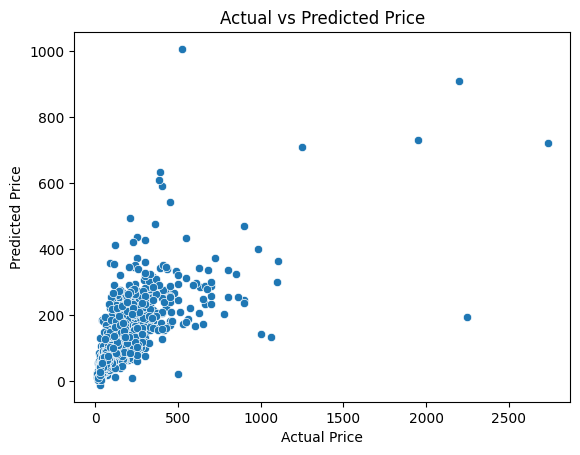

In [31]:
plt.Figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

In [32]:
sample = pd.DataFrame([{
	"size": 1,
	"total_sqft": 1200,
	"bath": 2,
	"balcony": 1
}])

In [33]:
svr.predict(sample)

C:\Users\admin\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


array([107953.36600988])